In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

In [3]:
import os
import sys
file_path = 'C:/Users/dB/deBivort/projects/ALVariability/analysis/plot_model_outputs.ipynb'
project_dir = os.path.join(file_path.split('ALVariability')[0], 'ALVariability')
sys.path.append(project_dir)

from utils.data_utils import make_df_AL_activity_long, make_orn_upn_frs, make_glomerular_odor_responses
from utils.plot_utils import set_font_sizes
from utils.odor_utils import load_door_data

set_font_sizes()

In [6]:
odor_names = np.array(['benzaldehyde', 
                        'butyric acid',
                        '2,3-butanedione',
                        '1-butanol',
                        'cyclohexanone',
                        'Z3-hexenol', # originally 'cis-3-hexen-1-ol',
                        'ethyl butyrate',
                        'ethyl acetate',
                        'geranyl acetate',
                        'isopentyl acetate', # originally 'isoamyl acetate',
                        '4-methylphenol', # originally '4-methyl phenol',
                        'methyl salicylate',
                        '3-methylthio-1-propanol',
                        'octanal',
                        '2-octanone',
                        'pentyl acetate', 
                        'E2-hexenal', # originally 'trans-2-hexenal',
                        'gamma-valerolactone'])

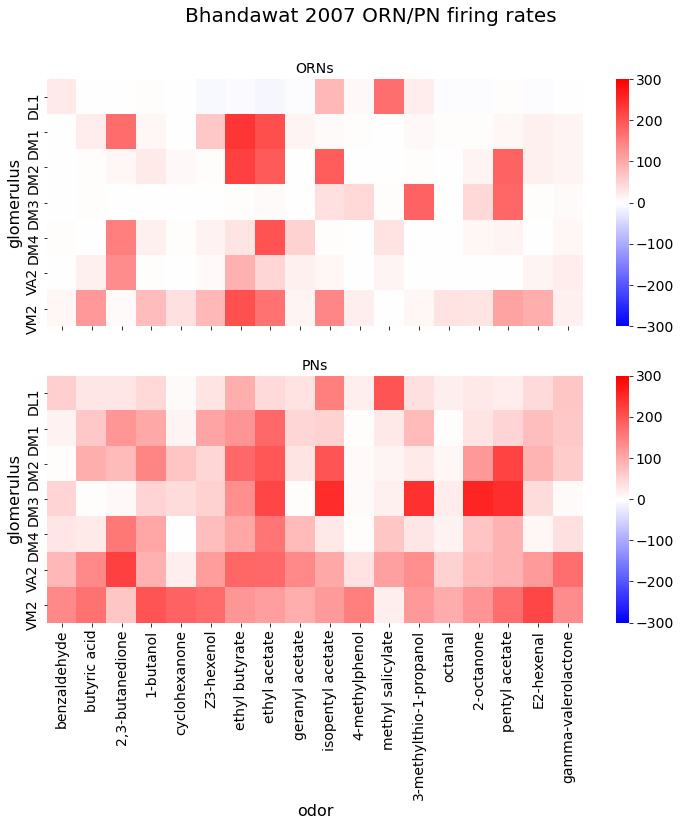

In [7]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12,10))
plt.suptitle('Bhandawat 2007 ORN/PN firing rates')
sns.heatmap(df_bhand_orn_glom_by_odor, ax=axs[0], vmin=-300, vmax=300, cmap='bwr')
sns.heatmap(df_bhand_pn_glom_by_odor, ax=axs[1], vmin=-300, vmax=300, cmap='bwr')
axs[0].set_title('ORNs')
axs[1].set_title('PNs')
axs[0].set_xlabel('')
plt.show()

In [8]:
def plot_glomerulus_PN_vs_ORN(orn_glom_by_odor, pn_glom_by_odor, gloms, suptit='Bhandawat 2007 ORN/PN firing rates'):
    fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(12,6))

    for i in range(len(gloms)):
        ax = axs[i // 4, i % 4]
        g = gloms[i]
        ax.set_title(gloms[i])

        x_array = orn_glom_by_odor.loc[g]
        y_array = pn_glom_by_odor.loc[g]

        ax.scatter(x_array, y_array, label=g, color='k')
        axs[-1, -1].scatter(x_array, y_array, label=g)

    axs[1, 0].set_xlabel('ORN response (Hz)')
    axs[1, 0].set_ylabel('PN response (Hz)')
    axs[-1, -1].set_title('all glomeruli')
    plt.suptitle(suptit)
    plt.show()

def plot_PN_ORN_frs(orn_glom_by_odor, pn_glom_by_odor, addtag=''):

    fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 3))
    
    arrs = [orn_glom_by_odor.values.flatten(), pn_glom_by_odor.values.flatten()]
    all_frs = np.concatenate(arrs)
    b = np.arange(min(all_frs), max(all_frs), 20)
    for i in range(len(arrs)):
        arr = arrs[i]
        weights = np.ones_like(arr) / len(arr)
        axs[i].hist(arr, weights=weights, bins=b)

    axs[0].set_title('ORNs'+addtag)
    axs[1].set_title('PNs'+addtag)
    axs[0].set_ylabel('fraction')
    axs[0].set_xlabel('firing rate rel. to baseline (Hz)')
    plt.show()

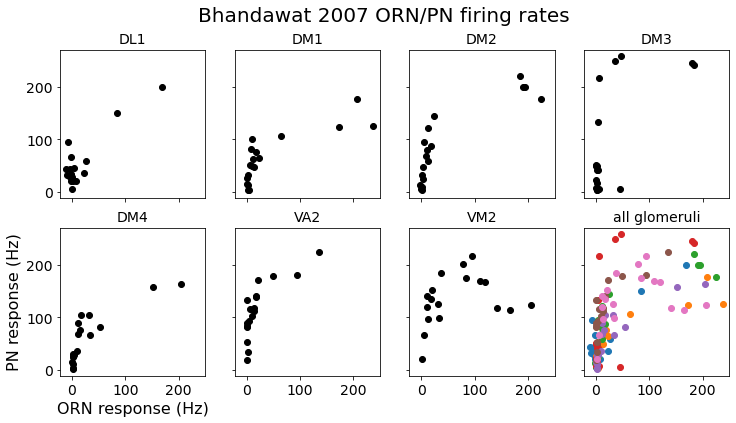

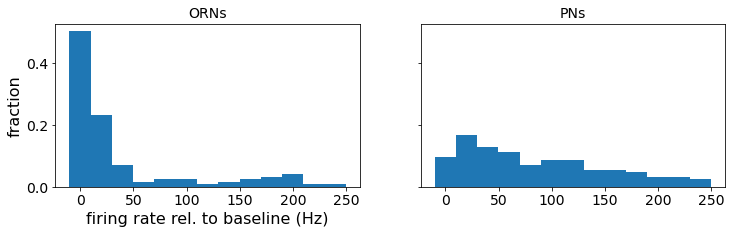

In [9]:
plot_glomerulus_PN_vs_ORN(df_bhand_orn_glom_by_odor, df_bhand_pn_glom_by_odor, bhand_gloms)
plot_PN_ORN_frs(df_bhand_orn_glom_by_odor, df_bhand_pn_glom_by_odor)

In [10]:
from sklearn.decomposition import PCA
def do_PCA(odor_by_glom_table):
    # column-center the data
    odor_by_glom_table_centered = odor_by_glom_table - odor_by_glom_table.mean(0)
    pca = PCA()
    pca.fit(odor_by_glom_table_centered)
    pca_projections = pca.transform(odor_by_glom_table_centered)[:, :2]
    return pca_projections, pca

def plot_PCA_projections(axs, odor_names, ORN_projections, PN_projections):
    #fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
    for i in range(len(odor_names)):
        axs[0].scatter(ORN_projections[i, 1], -ORN_projections[i, 0], label=odor_names[i])
        axs[1].scatter(PN_projections[i, 1], -PN_projections[i, 0], label=odor_names[i])

    for ax in axs:
        ax.axvline(0, ls='--', color='0.5')
        ax.axhline(0, ls='--', color='0.5')

    axs[0].set_xlabel('principal component 2 (Hz)')
    axs[0].set_ylabel('principal component 1 (Hz)')

    #plt.show()

In [11]:
bhand_ORN_projections, bhand_ORN_pca = do_PCA(df_bhand_orn_glom_by_odor.T)
bhand_PN_projections, bhand_PN_pca = do_PCA(df_bhand_pn_glom_by_odor.T)

In [12]:
bhand_ORN_pca.explained_variance_ratio_

array([0.53998591, 0.22172391, 0.1039589 , 0.07868434, 0.03292142,
       0.01638357, 0.00634195])

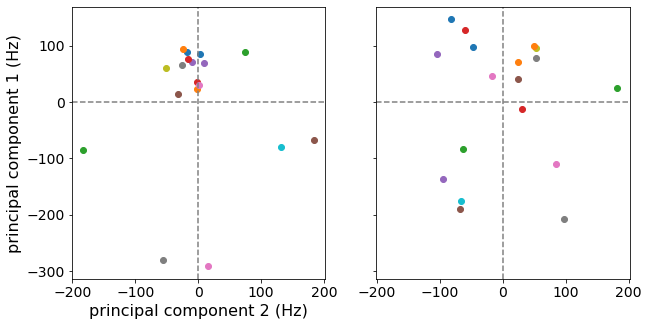

In [13]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
plot_PCA_projections(axs, odor_names, bhand_ORN_projections, bhand_PN_projections)
plt.show()

In [14]:
pairwise_dists_bhand_ORN_7gloms = pdist(df_bhand_orn_glom_by_odor.T, metric='euclidean')
pairwise_dists_bhand_PN_7gloms = pdist(df_bhand_pn_glom_by_odor.T, metric='euclidean')

#pairwise_dists_bhand_ORN_7gloms = pdist(bhand_ORN_projections, metric='euclidean')
#pairwise_dists_bhand_PN_7gloms = pdist(bhand_PN_projections, metric='euclidean')

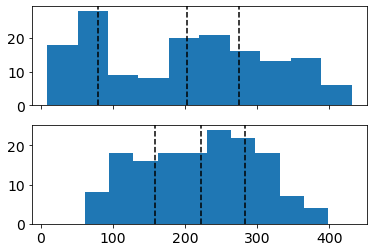

In [15]:
fig, axs = plt.subplots(2,1,sharex=True)

arrs = [pairwise_dists_bhand_ORN_7gloms, pairwise_dists_bhand_PN_7gloms]

for i in range(2):
    ax = axs[i]
    arr = arrs[i]
    ax.hist(arr)
    ax.axvline(np.quantile(arr, 0.25), c='k', ls='--')
    ax.axvline(np.quantile(arr, 0.5), c='k', ls='--')
    ax.axvline(np.quantile(arr, 0.75), c='k', ls='--')
    
plt.show()

In [16]:
bhand_ORN_pca.explained_variance_ratio_

array([0.53998591, 0.22172391, 0.1039589 , 0.07868434, 0.03292142,
       0.01638357, 0.00634195])

In [17]:
bhand_PN_pca.explained_variance_ratio_

array([0.50463136, 0.22432861, 0.13989352, 0.07304544, 0.03600669,
       0.017645  , 0.00444938])

In [18]:
df_neur_ids = pd.read_csv(os.path.join(project_dir, 'connectomics/hemibrain_v1_2/df_neur_ids.csv'), index_col=0)
df_neur_ids_bhand  = df_neur_ids.copy()[
        ((df_neur_ids.altype == 'ORN') & (df_neur_ids.glom.isin(bhand_gloms))) | 
         (df_neur_ids.altype == 'LN') | 
         ((df_neur_ids.altype == 'uPN') & (df_neur_ids.glom.isin(bhand_gloms))) |
         (df_neur_ids.altype == 'mPN')
     ]


#df_AL_activity = pd.read_csv('C:/Users/dB/deBivort/projects/ALVariability/candidates/df_AL_activity_a0.1_e0.25_i0.2_p6.0.csv', index_col=0) 
df_AL_activity = pd.read_csv('C:/Users/dB/deBivort/projects/ALVariability/run_model/save_sims_sensitivity_sweep/2021_4_22-5_23_9__0v12_all0.1_ecol0.4_icol0.2_pcol4.0_sweep_Bhandawat_odors_5_23_9/df_AL_activity.csv', index_col=0) 
#df_AL_activity = pd.read_csv('C:/Users/dB/deBivort/projects/ALVariability/run_model/save_sims_sensitivity_sweep/2021_4_22-5_30_42__0v12_all0.1_ecol0.5_icol0.2_pcol2.0_sweep_Bhandawat_odors_5_30_42/df_AL_activity.csv', index_col=0)

### BHANDAWAT VERSION
df_AL_activity_bhand  = df_AL_activity.copy()[
    ((df_AL_activity.neur_type == 'ORN') & (df_AL_activity.glom.isin(bhand_gloms))) | 
    (df_AL_activity.neur_type.isin(['iLN', 'eLN'])) | 
    ((df_AL_activity.neur_type == 'uPN') & (df_AL_activity.glom.isin(bhand_gloms))) |
    (df_AL_activity.neur_type == 'mPN')
]

In [19]:
## ORN and PN firing rates
df_AL_activity_long_bhand = make_df_AL_activity_long(df_AL_activity_bhand)
df_model_orn_frs_ONOFF, df_model_pn_frs_ONOFF = make_orn_upn_frs(df_AL_activity_bhand, odor_names, df_neur_ids_bhand.reset_index(),
                                                  sub_pre=True, olf_only=True)

In [20]:
df_model_orn_glom_by_odor, df_model_pn_glom_by_odor = \
        make_glomerular_odor_responses(df_model_orn_frs_ONOFF, df_model_pn_frs_ONOFF, df_AL_activity_bhand)

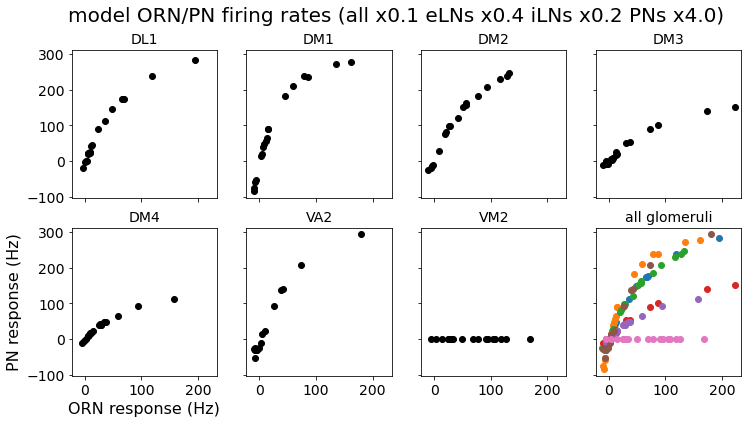

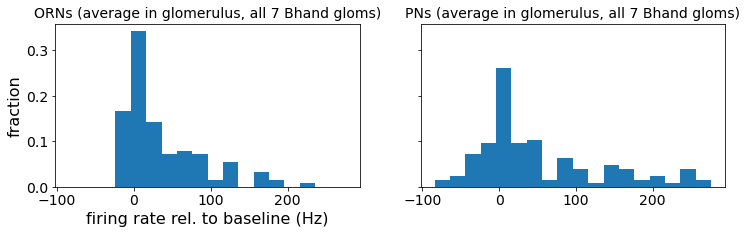

In [21]:
plot_glomerulus_PN_vs_ORN(df_model_orn_glom_by_odor, df_model_pn_glom_by_odor, bhand_gloms, suptit='model ORN/PN firing rates (all x0.1 eLNs x0.4 iLNs x0.2 PNs x4.0)')
plot_PN_ORN_frs(df_model_orn_glom_by_odor, df_model_pn_glom_by_odor,
               addtag=' (average in glomerulus, all 7 Bhand gloms)')

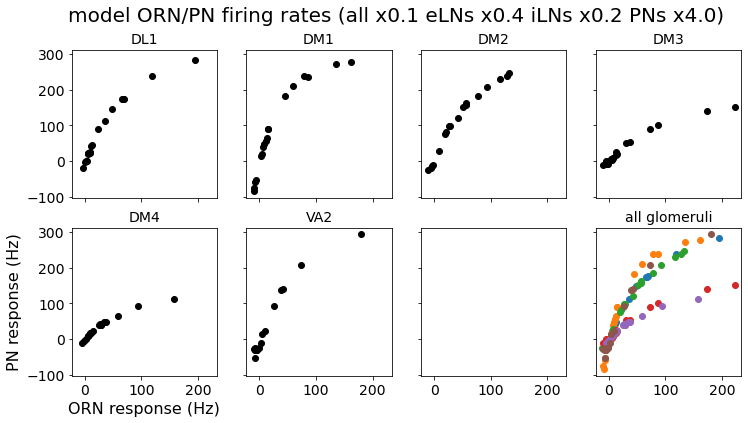

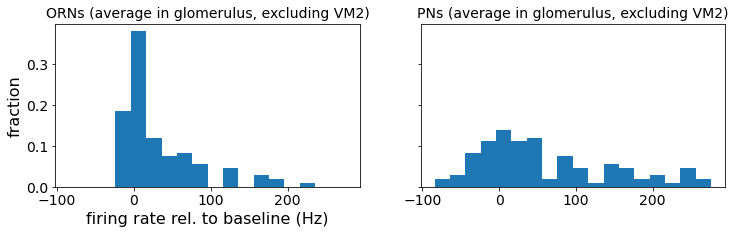

In [22]:
df_model_orn_glom_by_odor_6GLOMS = df_model_orn_glom_by_odor.loc[model_bhand_gloms]
df_model_pn_glom_by_odor_6GLOMS = df_model_pn_glom_by_odor.loc[model_bhand_gloms]
plot_glomerulus_PN_vs_ORN(df_model_orn_glom_by_odor_6GLOMS, df_model_pn_glom_by_odor_6GLOMS, model_bhand_gloms,
                          suptit='model ORN/PN firing rates (all x0.1 eLNs x0.4 iLNs x0.2 PNs x4.0)')

plot_PN_ORN_frs(df_model_orn_glom_by_odor_6GLOMS, df_model_pn_glom_by_odor_6GLOMS,
                addtag = ' (average in glomerulus, excluding VM2)')

In [23]:
df_model_pn_glom_by_odor_6GLOMS.min().min()

-84.0

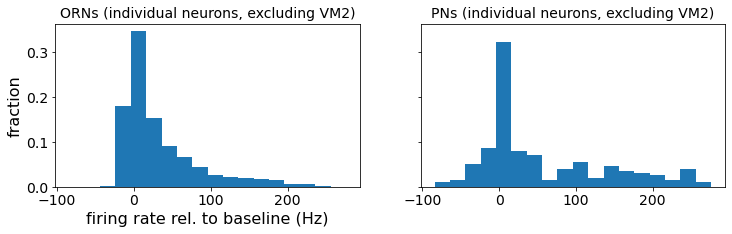

In [24]:
plot_PN_ORN_frs(df_model_orn_frs_ONOFF[~df_model_orn_frs_ONOFF.index.str.contains('VM2')], 
                df_model_pn_frs_ONOFF[~df_model_pn_frs_ONOFF.index.str.contains('VM2')],
                addtag=' (individual neurons, excluding VM2)'
               )

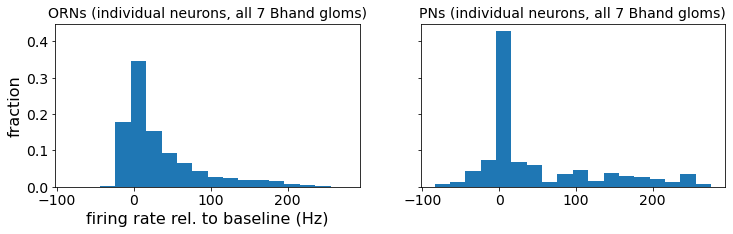

In [25]:
plot_PN_ORN_frs(df_model_orn_frs_ONOFF, df_model_pn_frs_ONOFF,
                addtag=' (individual neurons, all 7 Bhand gloms)'
               )

In [26]:
bhand_arr = df_bhand_pn_glom_by_odor.loc[model_bhand_gloms].values.flatten()
model_arr = df_model_pn_glom_by_odor.loc[model_bhand_gloms].values.flatten()

from scipy.stats import kstest

kstest(model_arr, bhand_arr)

KstestResult(statistic=0.28703703703703703, pvalue=0.00025137895971878574)

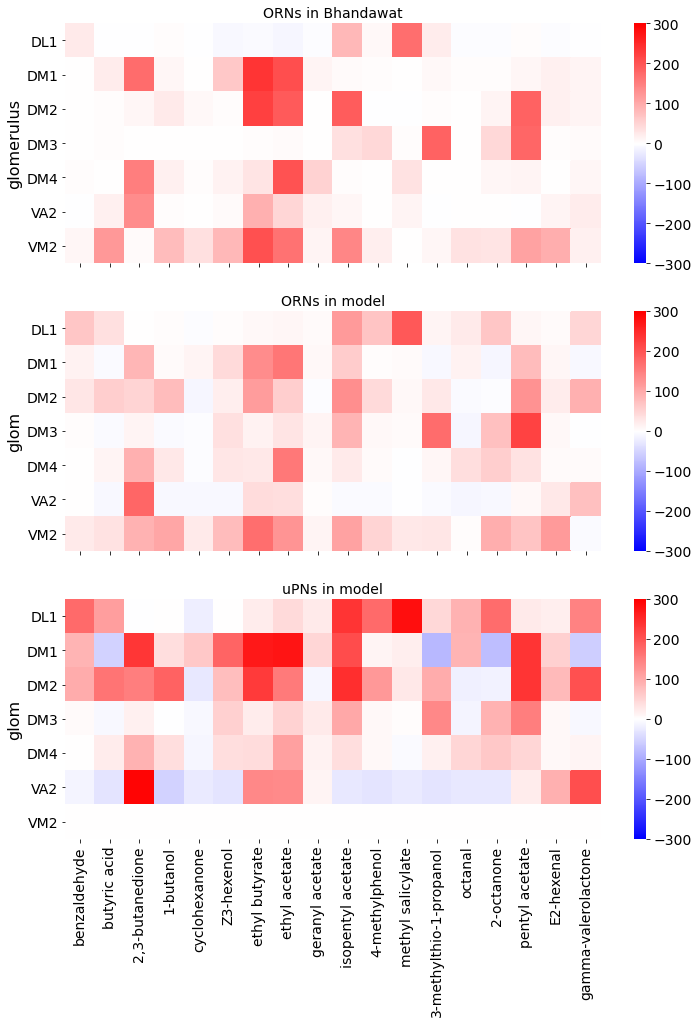

In [27]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(12,15))
sns.heatmap(df_bhand_orn_glom_by_odor.loc[bhand_gloms, odor_names], ax=axs[0], vmin=-300, vmax=300, cmap='bwr')
sns.heatmap(df_model_orn_glom_by_odor.loc[bhand_gloms, odor_names], ax=axs[1], vmin=-300, vmax=300, cmap='bwr')
sns.heatmap(df_model_pn_glom_by_odor.loc[bhand_gloms, odor_names], ax=axs[2], vmin=-300, vmax=300, cmap='bwr')
axs[0].set_title('ORNs in Bhandawat')
axs[1].set_title('ORNs in model')
axs[2].set_title('uPNs in model')
axs[0].set_xlabel('')
for ax in axs:
    ax.tick_params('y', labelrotation=0)
plt.show()

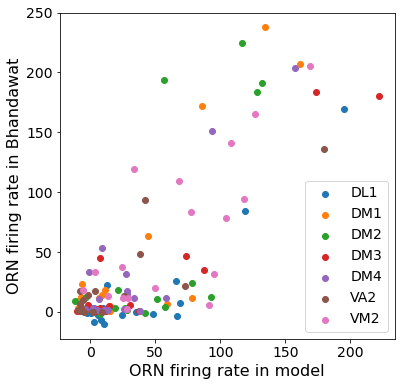

In [28]:
plt.figure(figsize=(6,6))
for g in bhand_gloms:
    plt.scatter(df_model_orn_glom_by_odor.loc[g, odor_names],
                df_bhand_orn_glom_by_odor.loc[g, odor_names], label=g)
plt.xlabel('ORN firing rate in model')
plt.ylabel('ORN firing rate in Bhandawat')
plt.legend()
plt.show()
plt.show()

In [29]:
max_model_ORN_fr = df_model_orn_glom_by_odor.max().max()
max_model_PN_fr = df_model_pn_glom_by_odor.max().max()
df_model_pn_glom_by_odor_SCALED = df_model_pn_glom_by_odor * max_model_ORN_fr / max_model_PN_fr

In [30]:
bhand_noVM2_ORN_projections, bhand_noVM2_ORN_pca = do_PCA(df_bhand_orn_glom_by_odor.loc[model_bhand_gloms].T)
bhand_noVM2_PN_projections, bhand_noVM2_PN_pca = do_PCA(df_bhand_pn_glom_by_odor.loc[model_bhand_gloms].T)

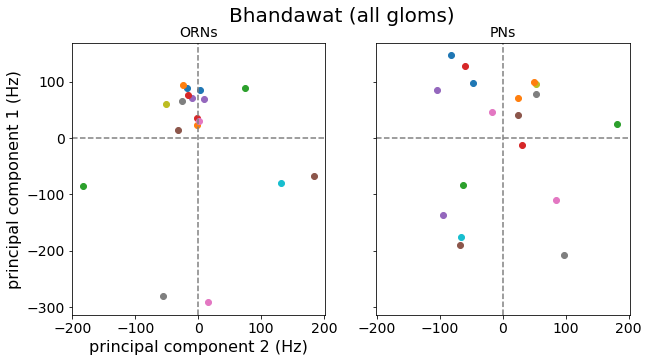

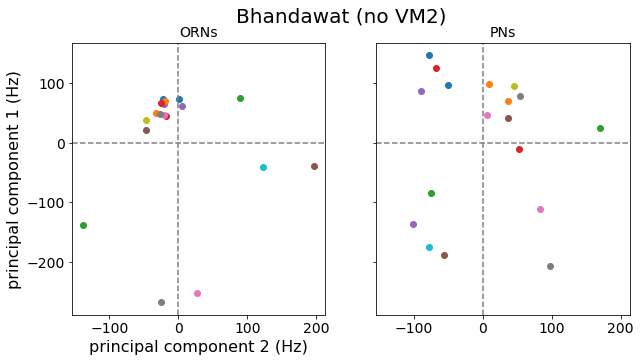

In [31]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
plt.suptitle('Bhandawat (all gloms)')
axs[0].set_title('ORNs'); axs[1].set_title('PNs')
plot_PCA_projections(axs, odor_names, bhand_ORN_projections, bhand_PN_projections)
plt.show()

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
plt.suptitle('Bhandawat (no VM2)')
axs[0].set_title('ORNs'); axs[1].set_title('PNs')
plot_PCA_projections(axs, odor_names, bhand_noVM2_ORN_projections, bhand_noVM2_PN_projections)
plt.show()

In [32]:
model_ORN_projections, model_ORN_pca = do_PCA(df_model_orn_glom_by_odor.loc[model_bhand_gloms].T)
model_PN_projections, model_PN_pca = do_PCA(df_model_pn_glom_by_odor.loc[model_bhand_gloms].T)

df_model_orn_glom_by_odor_centered = df_model_orn_glom_by_odor.loc[model_bhand_gloms].T
df_model_orn_glom_by_odor_centered -= df_model_orn_glom_by_odor_centered.mean(0)
df_model_pn_glom_by_odor_centered = df_model_pn_glom_by_odor.loc[model_bhand_gloms].T
df_model_pn_glom_by_odor_centered -= df_model_pn_glom_by_odor_centered.mean(0)

model_ORN_projections_onto_bhand_noVM2 = bhand_noVM2_ORN_pca.transform(df_model_orn_glom_by_odor_centered)[:, :2]
model_PN_projections_onto_bhand_noVM2 = bhand_noVM2_PN_pca.transform(df_model_pn_glom_by_odor_centered)[:, :2]

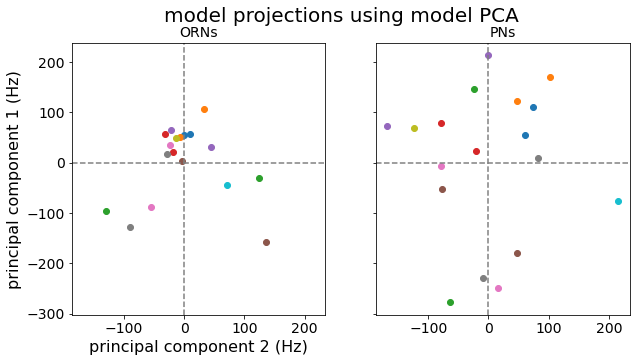

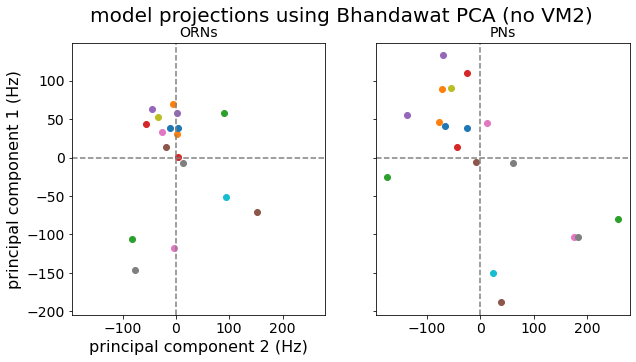

In [33]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
plt.suptitle('model projections using model PCA')
axs[0].set_title('ORNs'); axs[1].set_title('PNs')
plot_PCA_projections(axs, odor_names, model_ORN_projections, model_PN_projections)
plt.show()

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
plt.suptitle('model projections using Bhandawat PCA (no VM2)')
axs[0].set_title('ORNs'); axs[1].set_title('PNs')
plot_PCA_projections(axs, odor_names, model_ORN_projections_onto_bhand_noVM2, model_PN_projections_onto_bhand_noVM2)
plt.show()

In [34]:
bhand_orndists = pdist(bhand_ORN_projections[:, :2], metric='euclidean')
bhand_pndists = pdist(bhand_PN_projections[:, :2], metric='euclidean')

bhand_noVM2_orndists = pdist(bhand_noVM2_ORN_projections[:, :2], metric='euclidean')
bhand_noVM2_pndists = pdist(bhand_noVM2_PN_projections[:, :2], metric='euclidean')

In [35]:
model_pca_orndists = pdist(model_ORN_projections[:, :2], metric='euclidean')
model_pca_pndists = pdist(model_PN_projections[:, :2], metric='euclidean')

model_proj_onto_bhand_noVM2_orndists = pdist(model_ORN_projections_onto_bhand_noVM2[:, :2], metric='euclidean')
model_proj_onto_bhand_noVM2_pndists = pdist(model_PN_projections_onto_bhand_noVM2[:, :2], metric='euclidean')

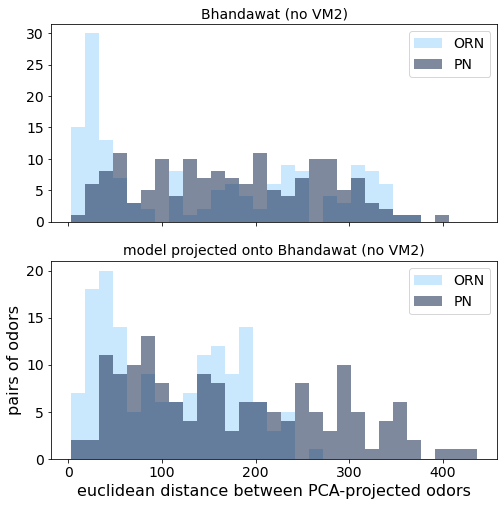

In [36]:
orn_arrs = [bhand_noVM2_orndists, model_proj_onto_bhand_noVM2_orndists]
pn_arrs = [bhand_noVM2_pndists, model_proj_onto_bhand_noVM2_pndists]
n_arrs = len(pn_arrs)
titls = ['Bhandawat (no VM2)', 'model projected onto Bhandawat (no VM2)']

arrs = np.concatenate((orn_arrs, pn_arrs))
mindist = min([min(r) for r in arrs])
maxdist = max([max(r) for r in arrs])
b = np.linspace(mindist, maxdist, 30)

fig, axs = plt.subplots(n_arrs, 1, sharex=True, figsize=(8,4*n_arrs))

for i in range(n_arrs):
    axs[i].hist(orn_arrs[i], alpha=0.5, bins=b, label='ORN', color='xkcd:light blue')
    axs[i].hist(pn_arrs[i], alpha=0.5, bins=b, label='PN', color='xkcd:navy')
    axs[i].legend()
    axs[i].set_title(titls[i])

axs[-1].set_xlabel('euclidean distance between PCA-projected odors')
axs[-1].set_ylabel('pairs of odors')
plt.show()

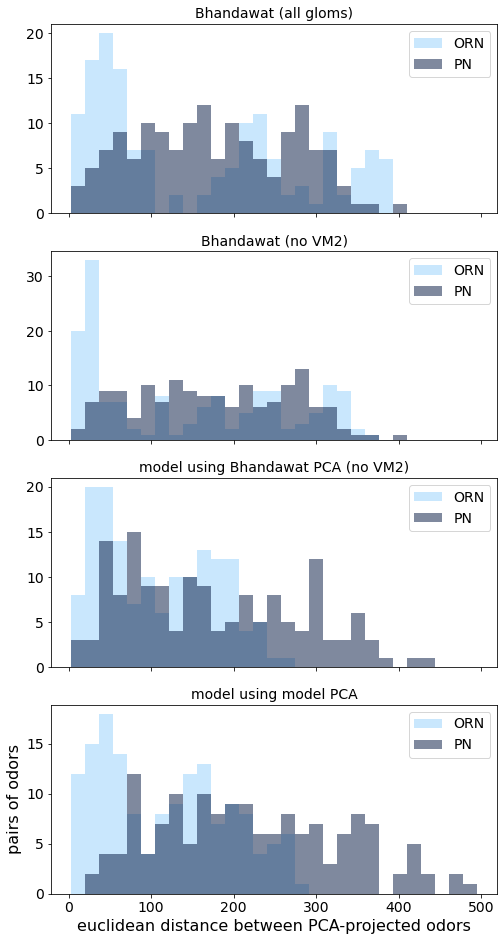

In [37]:
orn_arrs = [bhand_orndists, bhand_noVM2_orndists, model_proj_onto_bhand_noVM2_orndists, model_pca_orndists]
pn_arrs = [bhand_pndists, bhand_noVM2_pndists, model_proj_onto_bhand_noVM2_pndists, model_pca_pndists]
n_arrs = len(pn_arrs)
titls = ['Bhandawat (all gloms)', 
         'Bhandawat (no VM2)', 
         'model using Bhandawat PCA (no VM2)',
         'model using model PCA']

arrs = np.concatenate((orn_arrs, pn_arrs))
mindist = min([min(r) for r in arrs])
maxdist = max([max(r) for r in arrs])
b = np.linspace(mindist, maxdist, 30)

fig, axs = plt.subplots(n_arrs, 1, sharex=True, figsize=(8,4*n_arrs))

for i in range(n_arrs):
    axs[i].hist(orn_arrs[i], alpha=0.5, bins=b, label='ORN', color='xkcd:light blue')
    axs[i].hist(pn_arrs[i], alpha=0.5, bins=b, label='PN', color='xkcd:navy')
    axs[i].legend()
    axs[i].set_title(titls[i])

axs[-1].set_xlabel('euclidean distance between PCA-projected odors')
axs[-1].set_ylabel('pairs of odors')
plt.show()

In [38]:
bhand_ORN_pca.explained_variance_ratio_

array([0.53998591, 0.22172391, 0.1039589 , 0.07868434, 0.03292142,
       0.01638357, 0.00634195])

In [39]:
arrs = [pca_orndists, pca_pndists, pca_pnSCALEDdists]

mindist = min([min(r) for r in arrs])
maxdist = max([max(r) for r in arrs])
b = np.linspace(mindist, maxdist, 30)

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(8,11))
axs[0].hist(bhand_orndists, alpha=0.5, bins=b, label='ORN', color='xkcd:light blue')
axs[0].hist(bhand_pndists, alpha=0.5, bins=b, label='PN', color='xkcd:navy')
axs[0].legend()
axs[0].set_title('Bhandawat 2007')


axs[1].hist(pca_orndists, alpha=0.5, bins=b, label='ORN', color='xkcd:light blue')
axs[1].hist(pca_pndists, alpha=0.5, bins=b, label='PN', color='xkcd:navy')
axs[1].legend()
axs[1].set_title('model; excluding VM2')

axs[2].hist(pca_orndists, alpha=0.5, bins=b, label='ORN', color='xkcd:light blue')
axs[2].hist(pca_pnSCALEDdists, alpha=0.5, bins=b, label='PN', color='xkcd:navy')
axs[2].legend()
axs[2].set_title('model; excluding VM2, all PN frs scaled by max(ORN fr)/max(PN fr)')

axs[-1].set_xlabel('euclidean distance between PCA-projected odors')
axs[-1].set_ylabel('pairs of odors')
plt.show()

NameError: name 'pca_orndists' is not defined

In [ ]:
bhand_orndists = pdist(bhand_ORN_projections[:, :2], metric='euclidean')
bhand_pndists = pdist(bhand_PN_projections[:, :2], metric='euclidean')

pca_orndists = pdist(model_ORN_projections[:, :2], metric='euclidean')
pca_pndists = pdist(model_PN_projections[:, :2], metric='euclidean')
pca_pnSCALEDdists = pdist(model_PN_SCALED_projections[:, :2], metric='euclidean')


arrs = [pca_orndists, pca_pndists, pca_pnSCALEDdists]

mindist = min([min(r) for r in arrs])
maxdist = max([max(r) for r in arrs])
b = np.linspace(mindist, maxdist, 30)

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(8,11))
axs[0].hist(bhand_orndists, alpha=0.5, bins=b, label='ORN', color='xkcd:light blue')
axs[0].hist(bhand_pndists, alpha=0.5, bins=b, label='PN', color='xkcd:navy')
axs[0].legend()
axs[0].set_title('Bhandawat 2007')


axs[1].hist(pca_orndists, alpha=0.5, bins=b, label='ORN', color='xkcd:light blue')
axs[1].hist(pca_pndists, alpha=0.5, bins=b, label='PN', color='xkcd:navy')
axs[1].legend()
axs[1].set_title('model; excluding VM2')

axs[2].hist(pca_orndists, alpha=0.5, bins=b, label='ORN', color='xkcd:light blue')
axs[2].hist(pca_pnSCALEDdists, alpha=0.5, bins=b, label='PN', color='xkcd:navy')
axs[2].legend()
axs[2].set_title('model; excluding VM2, all PN frs scaled by max(ORN fr)/max(PN fr)')

axs[-1].set_xlabel('euclidean distance between PCA-projected odors')
axs[-1].set_ylabel('pairs of odors')
plt.show()